In [127]:
#Import dataset
from google.colab import files
uploads = files.upload()

Saving Zero_forcing_stats_new.xlsx to Zero_forcing_stats_new.xlsx


In [128]:
# Import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

my_seed = 1234
np.random.seed(my_seed)

In [193]:
#reading the Zero_forcing_stats.xlsx file, source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
df = pd.read_excel('Zero_forcing_stats_new.xlsx', sheet_name=1)
name = "ILAT_K3_3"
df.head(10)
#df[['Force set', 'Forcees', 'Forcers']] how to filter out columns

,Starting Graph,Clone/Anticlone Steps,Force set size,Force set,Num forces,Forcees,Forcers
0,ILAT_K2_3,3,8,1 2 3 4 9 11 12 13,8,7 8 6 14 5 16 15 10,11 12 13 1 9 7 8 6
1,ILAT_K2_3,3,8,1 2 3 4 9 11 12 14,8,7 8 5 13 6 16 15 10,11 12 14 1 9 7 8 5
2,ILAT_K2_3,3,8,1 2 3 4 10 11 12 13,8,7 8 6 14 5 16 15 9,11 12 13 1 10 7 8 6
3,ILAT_K2_3,3,8,1 2 3 4 10 11 12 14,8,7 8 5 13 6 16 15 9,11 12 14 1 10 7 8 5
4,ILAT_K2_3,3,8,1 2 3 5 9 11 12 14,8,8 7 13 4 15 16 6 10,12 14 1 11 8 7 13 4
5,ILAT_K2_3,3,8,1 2 3 5 9 11 12 15,8,8 6 10 4 7 16 14 13,12 15 3 9 11 4 5 8
6,ILAT_K2_3,3,8,1 2 3 5 9 12 13 14,8,8 7 15 6 11 10 4 16,12 14 8 15 1 3 9 7
7,ILAT_K2_3,3,8,1 2 3 5 9 12 13 15,8,8 6 14 7 11 10 4 16,12 15 8 14 1 3 9 6
8,ILAT_K2_3,3,8,1 2 3 5 9 12 14 15,8,8 7 6 13 11 10 4 16,12 14 15 8 1 3 9 7
9,ILAT_K2_3,3,8,1 2 3 5 9 12 15 16,8,8 6 10 4 7 13 11 14,12 15 3 9 16 6 4 7


In [194]:
df.tail(10)

,Starting Graph,Clone/Anticlone Steps,Force set size,Force set,Num forces,Forcees,Forcers
4961,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 15 19 20 ...,10,1 7 5 6 4 22 21 16 17 18,19 20 23 24 13 9 7 10 11 12
4962,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 15 19 21 ...,10,1 7 4 5 6 24 20 16 17 18,19 21 22 23 13 8 9 10 11 12
4963,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 15 19 21 ...,10,1 7 4 6 5 23 20 16 17 18,19 21 22 24 13 8 9 10 11 12
4964,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 15 19 21 ...,10,1 7 5 6 4 22 20 16 17 18,19 21 23 24 13 8 9 10 11 12
4965,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 19 20 22 ...,10,1 7 4 5 6 15 21 16 17 18,19 20 22 23 24 9 7 10 11 12
4966,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 19 21 22 ...,10,1 7 4 5 6 15 20 16 17 18,19 21 22 23 24 8 9 10 11 12
4967,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 15 19 20 22 ...,10,1 7 4 5 6 14 21 16 17 18,19 20 22 23 24 9 7 10 11 12
4968,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 15 19 21 22 ...,10,1 7 4 5 6 14 20 16 17 18,19 21 22 23 24 8 9 10 11 12
4969,ILAT_K3_3,3,14,2 3 8 9 10 11 12 14 15 19 20 22 ...,10,1 7 4 5 6 13 21 16 17 18,19 20 22 23 24 9 7 10 11 12
4970,ILAT_K3_3,3,14,2 3 8 9 10 11 12 14 15 19 21 22 ...,10,1 7 4 5 6 13 20 16 17 18,19 21 22 23 24 8 9 10 11 12


In [195]:
#extract the part we need
df = df.loc[df['Starting Graph'] == name]
df.index = np.arange(len(df))
df

,Starting Graph,Clone/Anticlone Steps,Force set size,Force set,Num forces,Forcees,Forcers
0,ILAT_K3_3,3,14,1 2 3 4 5 6 7 13 14 15 16 17 ...,10,10 11 12 9 8 22 23 24 21 19,16 17 18 20 13 4 5 6 7 10
1,ILAT_K3_3,3,14,1 2 3 4 5 6 7 13 14 15 16 17 ...,10,10 11 12 8 9 22 23 24 20 19,16 17 18 21 13 4 5 6 7 10
2,ILAT_K3_3,3,14,1 2 3 4 5 6 7 13 14 16 17 18 ...,10,10 11 12 9 8 15 23 24 21 19,16 17 18 20 22 4 5 6 7 10
3,ILAT_K3_3,3,14,1 2 3 4 5 6 7 13 14 16 17 18 ...,10,10 11 12 9 8 15 24 22 21 19,16 17 18 20 23 5 6 4 7 10
4,ILAT_K3_3,3,14,1 2 3 4 5 6 7 13 14 16 17 18 ...,10,10 11 12 9 8 15 22 23 21 19,16 17 18 20 24 6 4 5 7 10
...,...,...,...,...,...,...,...
2845,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 14 19 21 22 ...,10,1 7 4 5 6 15 20 16 17 18,19 21 22 23 24 8 9 10 11 12
2846,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 15 19 20 22 ...,10,1 7 4 5 6 14 21 16 17 18,19 20 22 23 24 9 7 10 11 12
2847,ILAT_K3_3,3,14,2 3 8 9 10 11 12 13 15 19 21 22 ...,10,1 7 4 5 6 14 20 16 17 18,19 21 22 23 24 8 9 10 11 12
2848,ILAT_K3_3,3,14,2 3 8 9 10 11 12 14 15 19 20 22 ...,10,1 7 4 5 6 13 21 16 17 18,19 20 22 23 24 9 7 10 11 12


In [182]:
len(df)

2850

## Data Cleaning

In [196]:
def str_to_list(txt):
  result = [int(num) for num in txt.split()]
  return result

In [197]:
df["Force set"] = df["Force set"].apply(str_to_list)
df["Forcees"] = df["Forcees"].apply(str_to_list)
df["Forcers"] = df["Forcers"].apply(str_to_list)

In [198]:
# check that conversion worked
#for i, l in enumerate(df["Force set"]):
#  print("list",i,"is",type(l))
df["Forcees"][0]

[10, 11, 12, 9, 8, 22, 23, 24, 21, 19]

## Analysis

In [200]:
#function that will get which clone something is of
#the clone of i in level k is i+2^k
def get_parent(child):
  #get the range of log
  log = math.log(child,2)
  log = math.floor(log)
  parent = child - (2**log)
  return parent

In [157]:
print(get_parent(15))

7


In [199]:
#function which gets chain of clones something is of
def get_pre(child):
  line = []
  temp = child
  #get the range of log
  while temp > 2:
    log = math.log(temp,2)
    if log == math.floor(log):
      log = int(log -1)
    else:
      log = math.floor(log)
    temp = temp - (2**log)
    line.append(temp)
  return line

In [201]:
#function gets chain of clones after given amount of cloning steps in graph
def get_post(child, steps):
  line = []
  temp = child
  while True:
    log = math.log(temp,2)
    log = math.ceil(log)
    if log == 0 and temp == 1:
      log = 1
    # child is in last step of clone hence no continuation
    if log > steps:
      return line
    else:
      temp = temp + 2**log
      line.append(temp)

In [202]:
print(get_pre(6))

[2]


In [203]:
print(get_post(3,3))

[7, 15]


In [204]:
def set_colours(row):
  #simple test: if a preceding is forcing clone - red, if clone is forcing preceding - orange, if a non-clones - blue
  # step 1: change strings for forcers and forcees to arrays
  steps = 3 #num of graph cloning steps
  size = 8
  forcers = row['Forcers']  #[13, 15, 7, 11, 3, 9, 5, 8]
  beForced = row['Forcees']  #[5,7,11,6,14,8,12,16]

  #forcers = row['Forcers']

  if row["Starting Graph"] == name:
    steps = 3
    size = 8
  else:
    steps = 4
    size = 24 #take the size from the graph


  colours = [0]*size
  for i in range(size):
    # step 2: for each forcee in the array, run get_pre(forcee)
    line = get_pre(beForced[i])
    # step 3: see if forcer in result of get_pre - colour red/orange if yes, if no run get_post(forcee)
    if forcers[i] in line:
      # Forcer is a preceding clone; check if it is direct precedor
      if line[0] == forcers[i]:
        colours[i] = "Red"
      else:
        colours[i] = "Orange"
    else:
      line = get_post(beForced[i], steps)
      # step 4: see if forcer in result of get_post - colour green/pruple if yes, if no colour black (not clones)
      if forcers[i] in line:
        # Forcer is a later clone of forcee, check if the one right after
        if line[0] == forcers[i]:
          colours[i] = "Green"
          #print(forcers, beForced, line, forcers[i], beForced[i])
        else:
          colours[i] = "Purple"
      else:
        colours[i] = "Black"
    #print(colours)
  return colours


In [205]:
df["Colours"] = df.apply(set_colours, axis=1)
#df.head()

### Colours Visualization
Legend:

Red - Forcer is a directly preceding clone of the forcee

Orange - Forcer is a preceding clone of the forcee but not direct

Green - Forcer is the direct following clone of the forcee

Purple - Forcer is a later clone of the forcee but not a direct one

Black - Forcer and forcee are not clones of each other

In [206]:
colours_count = df["Colours"].explode().value_counts()
if "Red" not in colours_count:
  colours_count["Red"] = 0
if "Green" not in colours_count:
  colours_count["Green"] = 0
if "Orange" not in colours_count:
  colours_count["Orange"] = 0
if "Purple" not in colours_count:
  colours_count["Purple"] = 0
if "Black" not in colours_count:
  colours_count["Black"] = 0
colours_count

Black     22014
Red         561
Purple      180
Green        45
Orange        0
Name: Colours, dtype: int64

Text(0.5, 1.0, 'Amount of occurances of integers in successfully forcing sets')

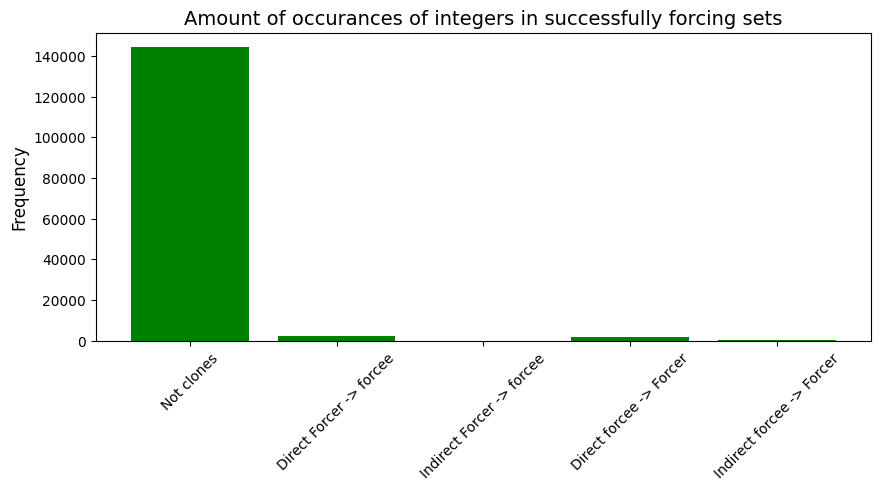

In [166]:
#plot this
tags = ["Not clones", "Direct Forcer -> forcee", "Direct forcee -> Forcer", "Indirect forcee -> Forcer", "Indirect Forcer -> forcee"] #x axis info
tags = {}
tags["Not clones"] = colours_count["Black"]
tags["Direct Forcer -> forcee"] = colours_count["Red"]
tags["Indirect Forcer -> forcee"] = colours_count["Orange"]
tags["Direct forcee -> Forcer"] = colours_count["Green"]
tags["Indirect forcee -> Forcer"] = colours_count["Purple"]

# Create plot
fig, ax = plt.subplots(figsize = (10,4))
ax.bar(tags.keys(), tags.values(), color="green") #color_discrete_sequence=["black", "red", "green", "purple", "orange"]
plt.xticks(rotation=45)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Amount of occurances of integers in successfully forcing sets", size = 14)

### Occurance of values in an initially forced set
refered to: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

In [207]:
occurance_count = df["Force set"].explode().value_counts()
print("%d unique numbers appeared in the sets. Here are the frequencies of them: " %(len(occurance_count)))
occurance_count

24 unique numbers appeared in the sets. Here are the frequencies of them: 


18    2580
16    2580
17    2580
2     2274
1     2274
3     2274
13    2031
14    2031
15    2031
6     1740
5     1740
4     1740
10    1614
11    1614
12    1614
19    1040
20    1040
21    1040
8     1022
9     1022
7     1022
22     999
23     999
24     999
Name: Force set, dtype: int64

In [168]:
#print out percentages
print("here are the occurances in fraction value: ")
df["Force set"].explode().value_counts(normalize=True)


here are the occurances in fraction value: 


1     0.059217
2     0.059217
3     0.059217
13    0.056018
14    0.056018
15    0.056018
4     0.048356
5     0.048356
6     0.048356
22    0.041760
24    0.041760
23    0.041760
7     0.035932
8     0.035932
9     0.035932
20    0.035337
21    0.035337
19    0.035337
16    0.030427
17    0.030427
18    0.030427
12    0.026286
11    0.026286
10    0.026286
Name: Force set, dtype: float64

Text(0.5, 1.0, 'Amount of occurences of integers in successfully forcing sets')

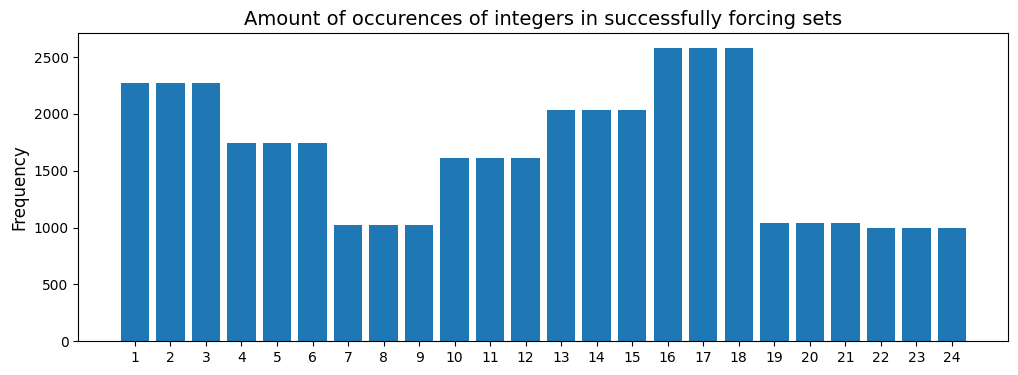

In [208]:
#plot this
values = df["Force set"].explode().value_counts().index.tolist() #x axis info

# Create plot
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(values, occurance_count)
plt.xticks(values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Amount of occurences of integers in successfully forcing sets", size = 14)

In [170]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}

    # Loop through all the tags
    for i, item in enumerate(unique_items):

        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [171]:
bool_16 = boolean_df(
  item_lists = df["Force set"],
  unique_items = sorted(values)
)

In [172]:
import seaborn as sn

In [173]:
#get correlation values
corr = bool_16.corr()


<Axes: >

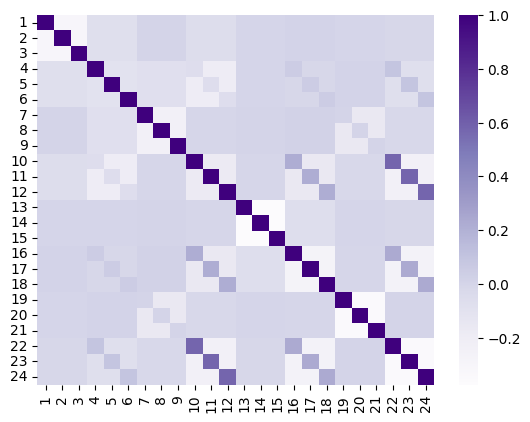

In [174]:
# plot the heatmap for correlation values
sn.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap = "Purples")

## Correlation between Forcers and Forcees

In [211]:
forcer_count = df["Forcers"].explode().value_counts()
print("%d unique numbers appeared in the forcer sets. Here are the frequencies of them: " %(len(forcer_count)))
forcer_count

19 unique numbers appeared in the forcer sets. Here are the frequencies of them: 


16    2580
17    2580
18    2580
4     2580
5     2580
6     2580
9     1334
8     1292
7     1250
10    1242
21    1040
19    1040
20    1040
22     999
23     999
24     999
11     858
12     534
13     393
Name: Forcers, dtype: int64

Text(0.5, 1.0, 'Amount of occurances of nodes being forcers')

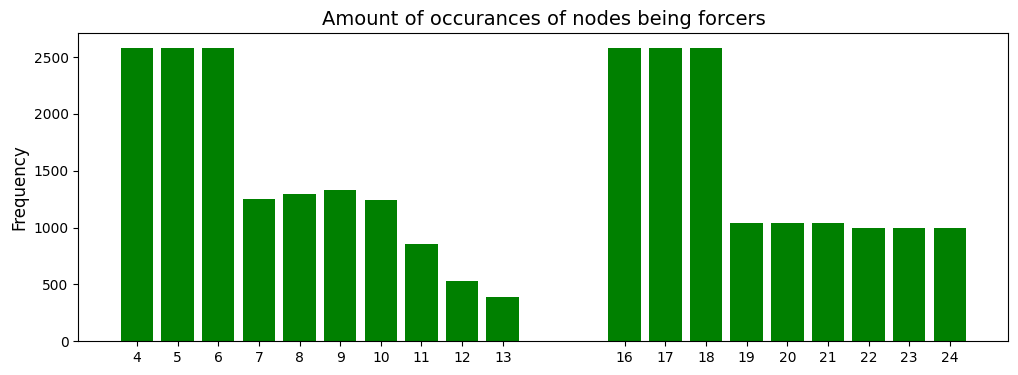

In [212]:
#plot this
forcer_values = df["Forcers"].explode().value_counts().index.tolist() #x axis info

# Create plot
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(forcer_values, forcer_count, color="Green")
plt.xticks(forcer_values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Amount of occurances of nodes being forcers", size = 14)

In [209]:
forcee_count = df["Forcees"].explode().value_counts()
print("%d unique numbers appeared in the forcee sets. Here are the frequencies of them: " %(len(forcee_count)))
forcee_count

24 unique numbers appeared in the forcee sets. Here are the frequencies of them: 


22    1851
23    1851
24    1851
9     1828
8     1828
7     1828
21    1810
19    1810
20    1810
10    1236
12    1236
11    1236
6     1110
4     1110
5     1110
14     819
13     819
15     819
3      576
2      576
1      576
16     270
17     270
18     270
Name: Forcees, dtype: int64

Text(0.5, 1.0, 'Amount of occurances of nodes being forced')

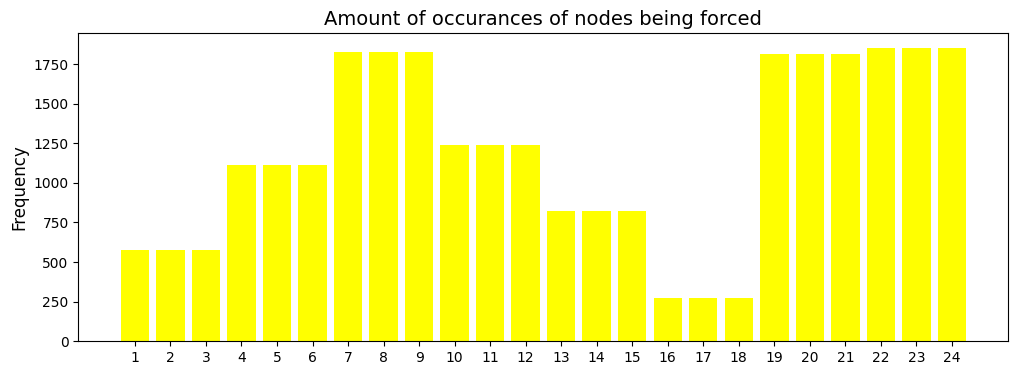

In [210]:
#plot this
forcee_values = df["Forcees"].explode().value_counts().index.tolist() #x axis info

# Create plot
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(forcee_values, forcee_count, color="Yellow")
plt.xticks(forcee_values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Amount of occurances of nodes being forced", size = 14)

Idea: make the forcer-forcee pairs into actual pairs and do value counts for those

In [57]:
bool_16_D = boolean_df(
  item_lists = df["Forcers"],
  unique_items = sorted(forcer_values)
)
bool_16_S = boolean_df(
  item_lists = df["Forcees"],
  unique_items = sorted(forcee_values)
)

In [58]:
#corr_pairs = bool_16_D.corr(bool_16_S)

In [ ]:
sn.heatmap(corr_pairs,
        cmap = "Purples")

### counts for how often value is in both forcee and forcer list